#Netflix Movies and TV Shows EDA - PART1 (Python + R)

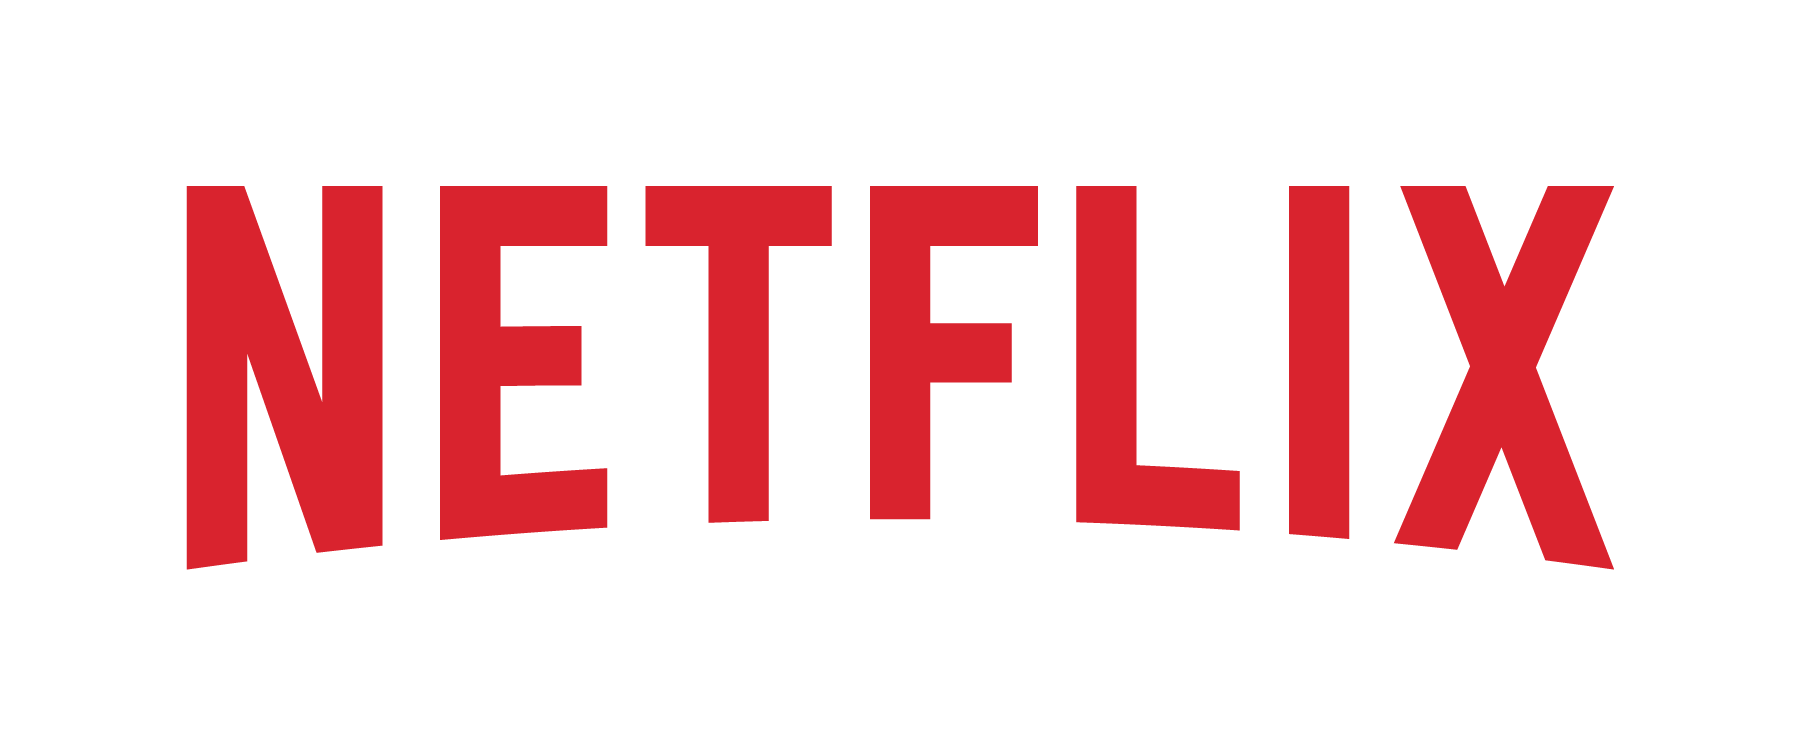

#INTRODUCTION

###This is a personal ***Data Analysis*** and ***Data Visualization*** project for the ***Data Visualization Subject*** at the International University, so we do not have a real ***Business Problem*** from ***Netflix*** to answer, we will ask our own questions through data. obtained from the dataset and answer them to solve problems to increase the growth of Netflix


#TABLE OF CONTENT (4 Stages)
###1. Ask:
* Quick look at the data
* The questions asked are based on the data set

###2. Prepare:
* Data Collection

###3. Process:
* Dealing with the Missing Values
* Data Cleaning

###4. Analyze:
* Data exploration
* Data visualization
* Data Analysis



# SETTING:

###Importing Libraries

In [ ]:
#standard library
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import datetime as dt
import missingno as msno

#library for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly as py
import plotly.graph_objs as go
import plotly.offline as py
import plotly.graph_objects as go
from plotly.offline import iplot
from plotly.subplots import make_subplots

#ensure that the matplotlib plots are displayed in the notebook's output cell,
%matplotlib inline

#library for EDA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation

###Enable plotly

In [ ]:
import plotly
plotly.__version__

'5.15.0'

In [ ]:
#Official google colaboratory method
#reference: https://stackoverflow.com/questions/54028965/how-to-display-plotly-outputs-in-google-collaboratory-notebooks
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
  '''))
  init_notebook_mode(connected=False)

In [ ]:
#initialize plotly for the notebook
py.offline.init_notebook_mode(connected = True)

#display all columns in dataframe.
pd.set_option("display.max_columns", None)

#setting the resolution of the figure
plt.rcParams['figure.dpi'] = 240

###Connect to the gg Drive

In [ ]:
#connect to gg drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#STAGE 1 (Ask)

#1. Quick look at the data

###Loading the dataset

In [ ]:
main_df = pd.read_csv("/content/drive/MyDrive/school_projects/DsDv/dataset/netflix_titles.csv")
main_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
main_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Print the indices of the columns along with their names
for idx, column in enumerate(main_df.columns):
    print(f"Column '{column}' is at index {idx}")

Column 'show_id' is at index 0
Column 'type' is at index 1
Column 'title' is at index 2
Column 'director' is at index 3
Column 'cast' is at index 4
Column 'country' is at index 5
Column 'date_added' is at index 6
Column 'release_year' is at index 7
Column 'rating' is at index 8
Column 'duration' is at index 9
Column 'listed_in' is at index 10
Column 'description' is at index 11


In [ ]:
## Define the new names for the columns at index 6 and 8
new_names = ['age_certification', 'genres']

# Create a dictionary for renaming
rename_dict = {main_df.columns[8]: new_names[0], main_df.columns[10]: new_names[1]}

# Rename the columns
main_df.rename(columns=rename_dict, inplace=True)

# Save the modified dataset
main_df.to_csv('modified_netflix_titles.csv', index=False)

In [ ]:
main_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,age_certification,duration,genres,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


###Dataset Descriptions

In [ ]:
main_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'age_certification', 'duration', 'genres',
       'description'],
      dtype='object')

In [ ]:
main_df.dtypes

show_id              object
type                 object
title                object
director             object
cast                 object
country              object
date_added           object
release_year          int64
age_certification    object
duration             object
genres               object
description          object
dtype: object

In [ ]:
main_df.size

105684

In [ ]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   show_id            8807 non-null   object
 1   type               8807 non-null   object
 2   title              8807 non-null   object
 3   director           6173 non-null   object
 4   cast               7982 non-null   object
 5   country            7976 non-null   object
 6   date_added         8797 non-null   object
 7   release_year       8807 non-null   int64 
 8   age_certification  8803 non-null   object
 9   duration           8804 non-null   object
 10  genres             8807 non-null   object
 11  description        8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
main_df.shape

(8807, 12)

The dataset has 8807 rows and 12 columns:
* **show_id**: unique id of each show (not much of a use for us in this notebook)
* **type**: The category of a show, can be either a Movie or a TV Show
* **title**: Name of the show
* **director**: Name of the director(s) of the show
* **cast**: Name of actors and other cast of the show
* **country**: Name of countries the show is available to watch on Netflix
* **date_added**: Date when the show was added on Netflix
* **release_yea**r: Release year of the show
* **age_certification**: The age limit on Netflix
* **duration**: Time duration of the show
* **genres**: Genre of the show
* **description**: Some text describing the show

#2. The questions asked are based on the data set

### Based on a ***Quick look at the data set***, we provide the following directions for the questions that need to be addresse:


# STAGE 2 (Prepare)

### Data Collection
* About this Dataset: Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.
* This dataset is collected from Flixable which is a third-party Netflix search engine, and available on Kaggle website for free
* link Kaggle: https://www.kaggle.com/datasets/shivamb/netflix-shows

# STAGE 3 (Process)

###2. Dealing with Missing-Values
* White space and white color will represent missing data

* Quick visualize of missing-values by missingo library

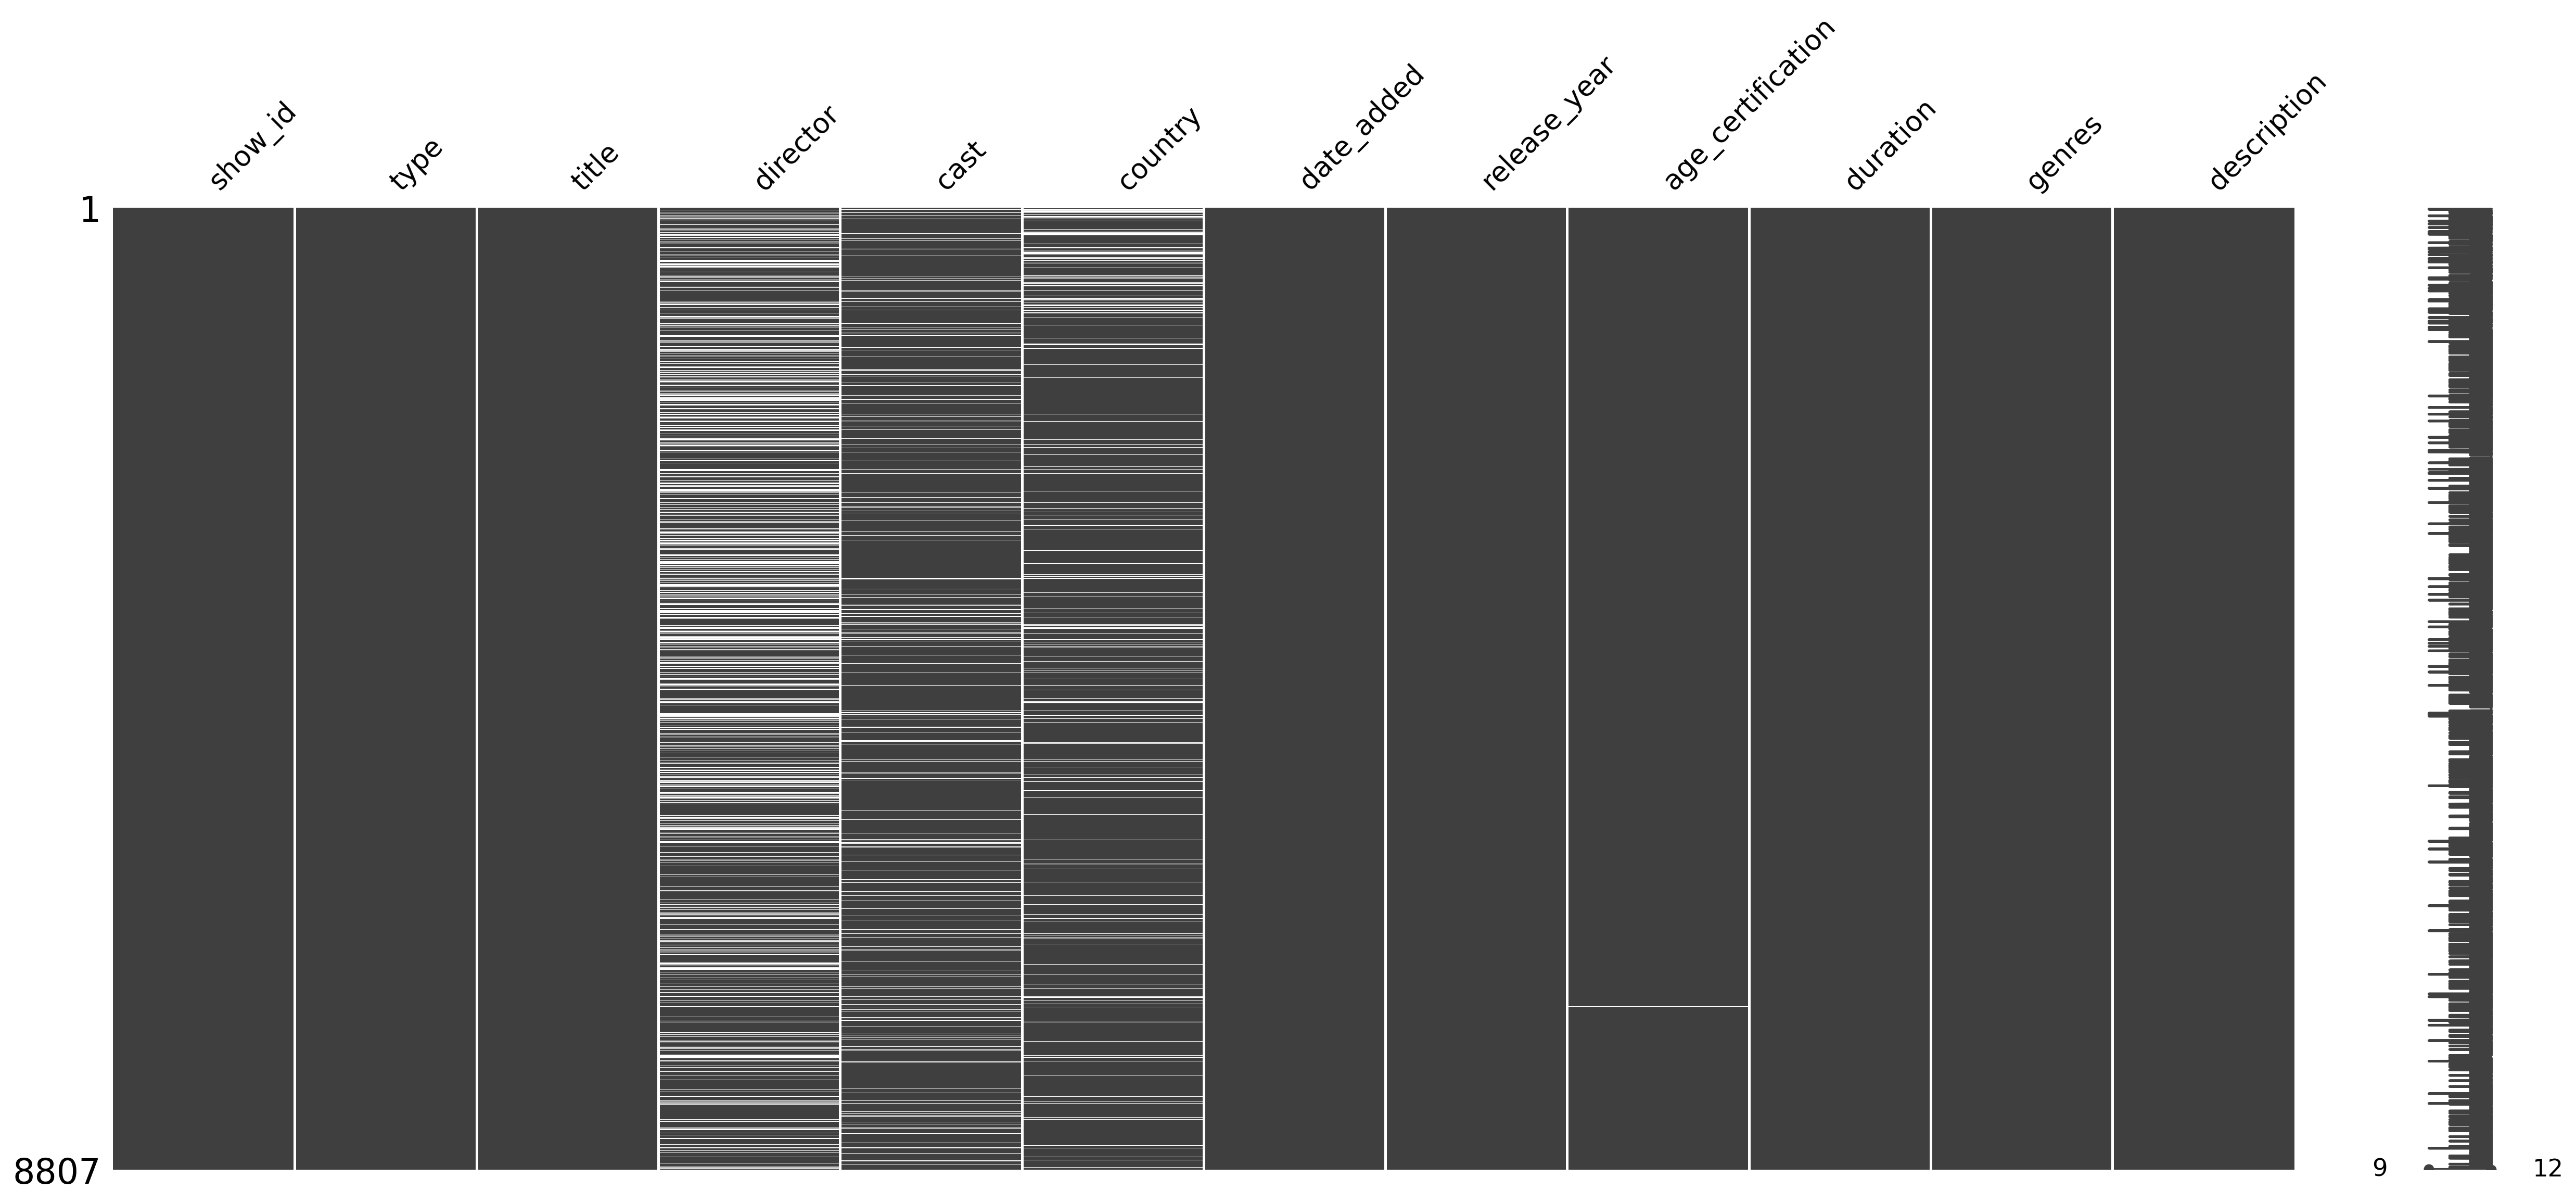

In [ ]:
#visualize missing values as a matrix
msno.matrix(main_df);

* Quick conclusion:
* **"director"** has ***peculiar pattern*** missing value that stand out for the others
* **"cast"** and **"country"** have a ***similar pattern*** missing value
* **"date_added"**, **"rating"** and **"duration"** pattern are ***insignificant***

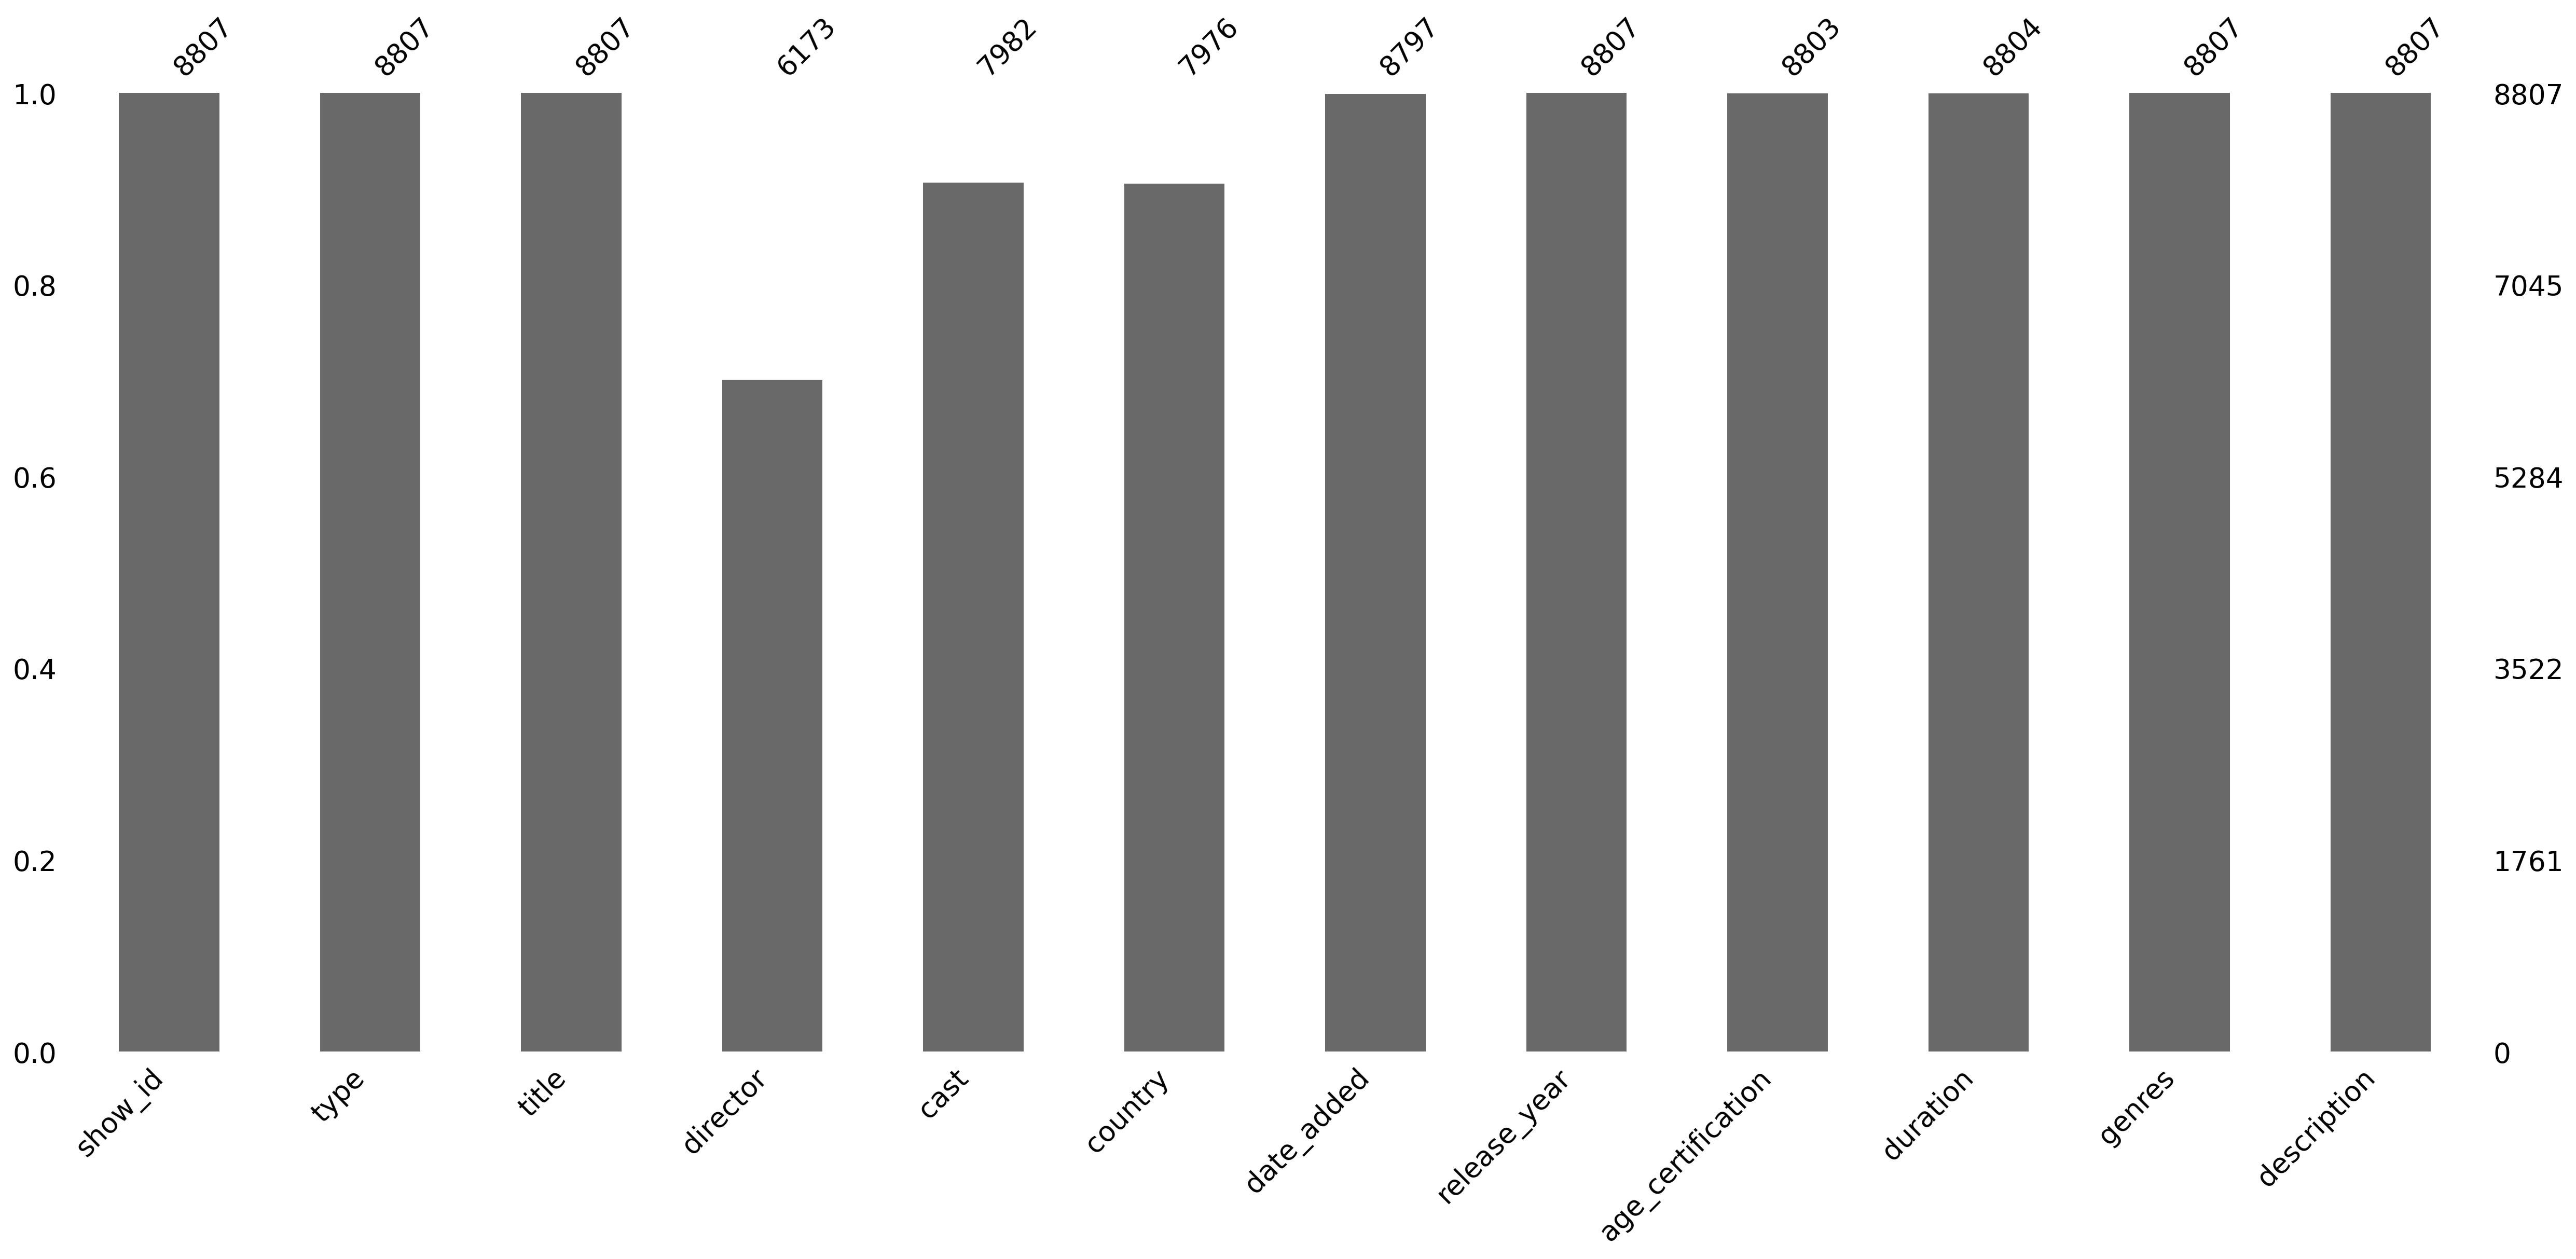

In [ ]:
#visualize the number of missing values as a bar chart
msno.bar(main_df);

* Quick conclusion:
* "Director" has the most missing values
* Next are "Cast" and "Country"
* "Date_added", "Rating" and "Duration"have the fewest missing values

<Axes: >

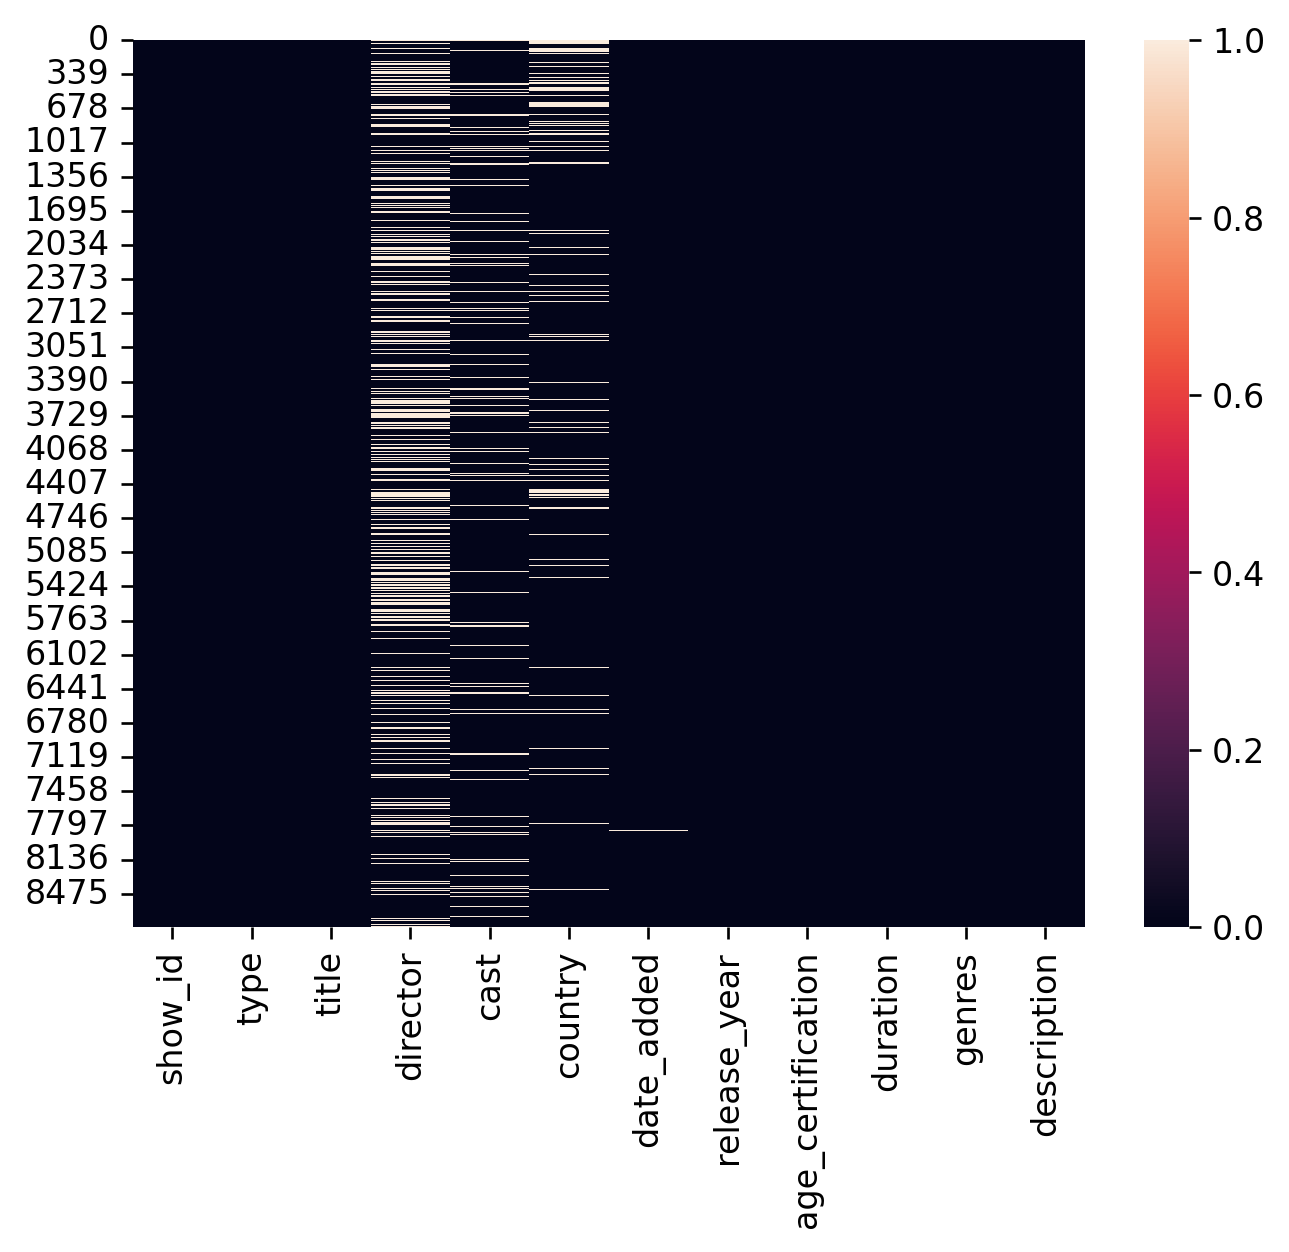

In [ ]:
#visualize missing value by heatmap
sns.heatmap(main_df.isna())

###Number of missing-values

In [ ]:
main_df.isna().sum()

show_id                 0
type                    0
title                   0
director             2634
cast                  825
country               831
date_added             10
release_year            0
age_certification       4
duration                3
genres                  0
description             0
dtype: int64

In [ ]:
#assign the number of missing value
director_null = 2634
cast_null = 825
country_null = 831
date_null = 10
age_certification = 4
duration_null = 3

###Visualize the number of missing value

In [ ]:
labels = ["director", "cast", "country", "date_added", "age_certification", "duration"]
values = [director_null, cast_null, country_null, date_null, age_certification, duration_null]
colors = ['#888888', '#444444', '#333333', "#000000", "#000000", "#000000", "#111111"]


df_miss = px.data.tips()
fig_ = px.bar(df_miss, x = labels, y = values)

# Customize the layout (optional)
fig_.update_traces(marker=dict(color=colors))
fig_.update_layout(title="Number of Missing Values")

enable_plotly_in_cell()
fig_.show()

Output hidden; open in https://colab.research.google.com to view.

###Percentage missing value

In [ ]:
#missing data
for i in main_df.columns:
  null_rate = main_df[i].isna().sum() / len(main_df) * 100
  if null_rate > 0 :
    print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
age_certification null rate: 0.05%
duration null rate: 0.03%


###Visualize missing value with percentage

In [ ]:
column_names = ["director", "cast", "country", "date_added", "age_certification", "duration", "non missing-value"]
null_rates = [29.91, 9.37, 9.44, 0.11, 0.05, 0.03, 51.09]
colors = ['#888888', '#444444', '#333333', "#000000", "#000000", "#000000", "#111111"]

#donut-like pie chart
fig_missing = go.Figure(data=[go.Pie(labels = column_names, values = null_rates, hole=.3)])

# Customize the layout (optional)
fig_missing.update_traces(marker=dict(colors=colors))
fig_missing.update_layout(title="Percentage of Missing Values")

#call enable function
enable_plotly_in_cell()
fig_missing.show()

Output hidden; open in https://colab.research.google.com to view.

* => The rate of missing values ​​accounts for nearly half of the dataset

* Visualize the correlation between the number of missing values in different columns

<Axes: >

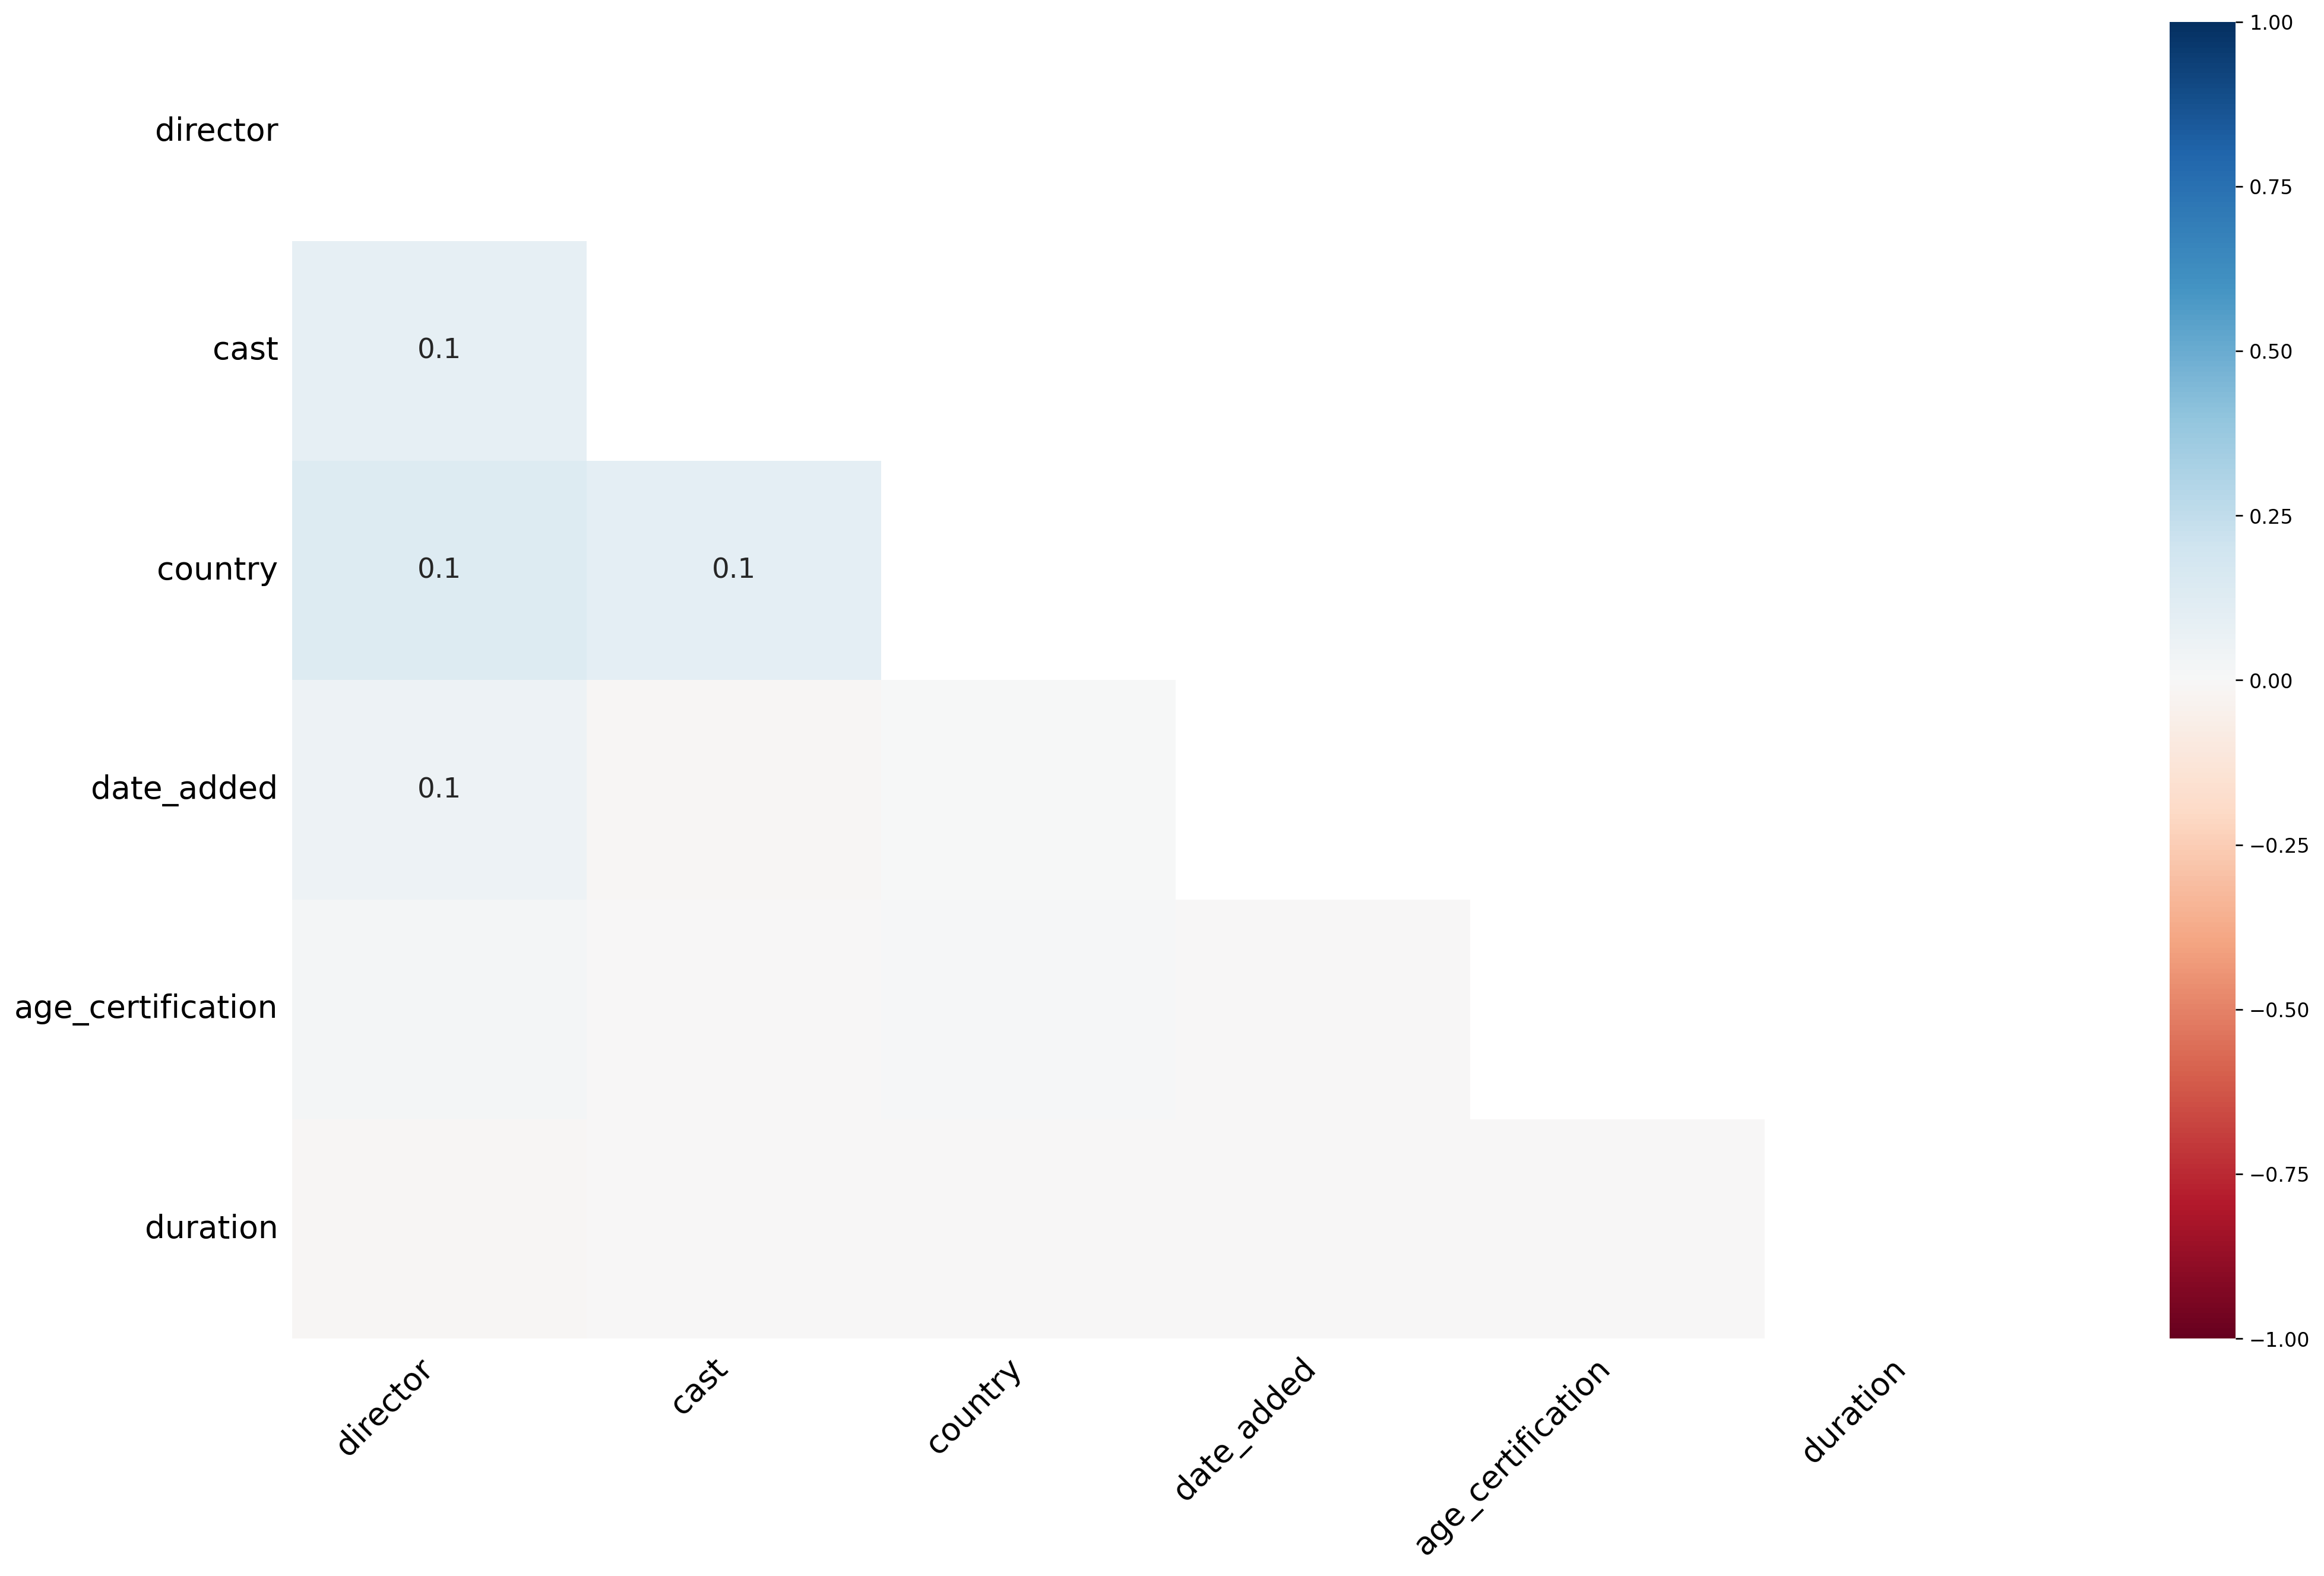

In [ ]:
msno.heatmap(main_df)

* Quick conclusion:
* The heatmap displays the relationship in missing data patterns between pairs of columns. When the value is close to 0, it indicates that there is no significant connection between the presence of missing values in two variables.







###2. Data Cleaning

###Let's examine the data to determine the quantity of unique value it contains.




In [ ]:
#number of unique elements
main_df.nunique()

show_id              8807
type                    2
title                8807
director             4528
cast                 7692
country               748
date_added           1767
release_year           74
age_certification      17
duration              220
genres                514
description          8775
dtype: int64

In [ ]:
#detect missing values again
main_df.isna().sum()

show_id                 0
type                    0
title                   0
director             2634
cast                  825
country               831
date_added             10
release_year            0
age_certification       4
duration                3
genres                  0
description             0
dtype: int64

### The missing values are in:
* 1. "director": This is very little information that is not required for the analysis, therefore I will remove it.
* 2. "cast": Too many different values, I will drop it.
* 3. "country":This is an important variable, thus we must correct it.
* 4. "date_added": Just a few cases, therefore let's scrap them.
* 5. "age_certification": also as "date_added", let's get rid of them.
* 6. "duration": also as "age_certification"



###Cleaning the "age_certification"



In [ ]:
# display all the unique values in the age_certification column
main_df["age_certification"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

### Description for the " Age_Certification":
* TV-Y: (For all ages): Suitable for all audiences. This show or movie is suitable for children and families.

* TV-Y7: (For ages 7 and up): May contain a little drama or action, but still suitable for children ages 7 and up.

* TV-Y7-FV: (For children 7 years and older with chore restrictions): Similar to TV-Y7, but has some chore restrictions, which may not be suitable for younger children.

* TV-G: (Suitable for all ages): Program suitable for all audiences, but may contain children's content.

* TV-PG: (Suitable for all ages with restrictions): May contain some content not suitable for young children, adult guidance is required.

* TV-14: (For audiences 14 and older): This show or movie may contain content inappropriate for children under 14 years of age.

* TV-MA: (Unsuitable for children under 17): This show or movie contains content that is not suitable for children under 17.

* PG-13: (For audiences 13 years and older): Suitable for audiences 13 years and older. The movie may contain some content that is not suitable for children under 13 years old.

* PG: (Suitable for all ages with restrictions): Suitable for all audiences, but may contain some content not suitable for young children. Needs adult guidance.

* R: (Not suitable for children under 17 years old): This movie is not suitable for children under 17 years old without adult guidance. May contain sexual content or violence.

* G: (For all ages): Suitable for all audiences, especially for children and families.

* NC-17: (Not suitable for children under 17 years of age at all): This movie contains content that is not suitable for children under 17 years of age. Don't even watch it until you're old enough.

* 74 min, 84 min, 66 min: This is the duration of the movie or show in minutes. They indicate how much time you need to spend viewing that work.

* NR (Not Age-appropriate): Sometimes a work may not be age-appropriate or have no chart associated with it.

* UR (Age appropriate not yet determined): Similar to NR, UR also indicates that an appropriate age has not been determined for this work.

In [ ]:
# display all the null value in "age_certification"
main_df[main_df["age_certification"].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,age_certification,duration,genres,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


* => Because there are just 4 rows, I opted to search for substitutes online


In [ ]:
#fixing
age_certification_replacements = {
    5989: 'TV-AN',
    6827: 'TV-SS',
    7312: 'TV-GH',
    7537: 'TV-MA',
}

for id, rate in age_certification_replacements.items():
    main_df.iloc[id, 8] = rate

nan_count = main_df['age_certification'].isna().sum()

#checking the number of missing value after fixing
print(nan_count)

0


* => "age_certification" for missing values has been corrected.

###Drop "director" and "cast" columns



In [ ]:
#dropping
main_df = main_df.drop(['director', 'cast'], axis=1)
main_df.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'age_certification', 'duration', 'genres', 'description'],
      dtype='object')

###Fix "date_added" column

In [ ]:
# display all the null value in "date_added" column
main_df[main_df['date_added'].isna()]

,show_id,type,title,country,date_added,release_year,age_certification,duration,genres,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


* => Because it is impossible to identify the date_added, I will remove this 10 rows.

In [ ]:
#remove
main_df=main_df[main_df["date_added"].notna()]

###Fix "country" missing values



In [ ]:
main_df['country'] = main_df['country'].fillna(main_df['country'].mode()[0])

* => There are several entries where "country" has more than one value. So I'm going to create a new column with simply the first one so we can see which regions have the most productions.

In [ ]:
# Lets retrieve just the first country
main_df['principal_country'] = main_df['country'].apply(lambda x: x.split(",")[0])
main_df['principal_country'].head()

0    United States
1     South Africa
2    United States
3    United States
4            India
Name: principal_country, dtype: object

###Let's fix the missing "duration"

In [ ]:
#display all the unique value
main_df["duration"].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [ ]:
#display all the null value of "duration"
main_df[main_df["duration"].isna()]

,show_id,type,title,country,date_added,release_year,age_certification,duration,genres,description,principal_country
5541,s5542,Movie,Louis C.K. 2017,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",United States
5794,s5795,Movie,Louis C.K.: Hilarious,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,United States
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,United States


* => Since there are only 3 rows so I decided to find from internet.



In [ ]:
#fixing
duration_replacements = {
    5541: '70 mins',
    5794: '50 mins',
    5813: '90 mins',
}

for id, duration in duration_replacements.items():
    main_df.iloc[id, 7] = duration

main_df['duration'].isna().sum()

0

### Let's check the clean data


In [ ]:
main_df.isna().sum()

show_id              0
type                 0
title                0
country              0
date_added           0
release_year         0
age_certification    0
duration             0
genres               0
description          0
principal_country    0
dtype: int64

In [ ]:
main_df.dtypes

show_id              object
type                 object
title                object
country              object
date_added           object
release_year          int64
age_certification    object
duration             object
genres               object
description          object
principal_country    object
dtype: object

###Let's Generate new columns based on variables

###Year and month

In [ ]:
main_df['year_added'] = main_df['date_added'].apply(lambda x: x.split(" ")[-1])
main_df['year_added'].head()

0    2021
1    2021
2    2021
3    2021
4    2021
Name: year_added, dtype: object

In [ ]:
main_df['month_added'] = main_df['date_added'].apply(lambda x: x.split(" ")[0])
main_df['month_added'].head()

0    September
1    September
2    September
3    September
4    September
Name: month_added, dtype: object

###Targets based on "age_certification "

In [ ]:
ages_certification = {
    'TV-PG': 'Teens',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

main_df['target_ages'] = main_df['age_certification'].replace(ages_certification)
main_df['target_ages'].unique()


array(['Teens', 'Adults', 'Older Kids', 'Kids', '74 min', '84 min',
       '66 min', 'TV-AN', 'TV-SS', 'TV-GH'], dtype=object)

###Let's fix the datatype

In [ ]:
# type should be a category
main_df['type'] = pd.Categorical(main_df['type'])

# target_ages is another category (4 classes)
main_df['target_ages'] = pd.Categorical(main_df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

# Year added should be integer so we can compare with `released_year`
main_df['year_added'] = pd.to_numeric(main_df['year_added'])

In [ ]:
main_df.dtypes

show_id                object
type                 category
title                  object
country                object
date_added             object
release_year            int64
age_certification      object
duration               object
genres                 object
description            object
principal_country      object
year_added              int64
month_added            object
target_ages          category
dtype: object

In [ ]:
main_clean_df = main_df

In [ ]:
main_clean_df.head(5)

,show_id,type,title,country,date_added,release_year,age_certification,duration,genres,description,principal_country,year_added,month_added,target_ages
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",United States,2021,September,Teens
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",South Africa,2021,September,Adults
2,s3,TV Show,Ganglands,United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,United States,2021,September,Adults
3,s4,TV Show,Jailbirds New Orleans,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",United States,2021,September,Adults
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,India,2021,September,Adults


In [ ]:
# Assuming you have a cleaned DataFrame called 'cleaned_data'
# Replace 'cleaned_data' with the name of your DataFrame

# Specify the file path where you want to save the new CSV file
output_file_path = '/content/drive/MyDrive/school_projects/DsDv/dataset/netflix_titles_cleaned.csv'

# Save the DataFrame to a CSV file
main_clean_df.to_csv(output_file_path, index=False)

print(f"Cleaned data saved to {output_file_path}")

Cleaned data saved to /content/drive/MyDrive/school_projects/DsDv/dataset/netflix_titles_cleaned.csv
